# Easy v2e Tutorial

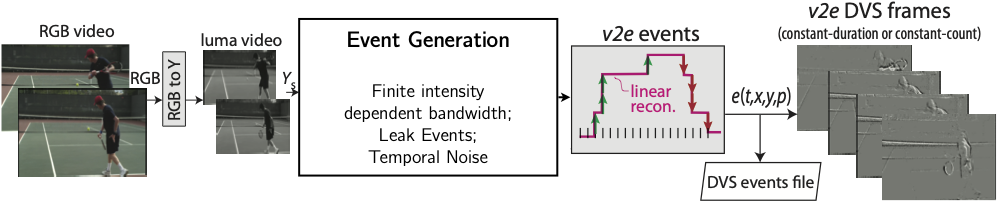

In [3]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=17QSN207h05S_b2ndXjLrqPbBTnYIl0Vb' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=17QSN207h05S_b2ndXjLrqPbBTnYIl0Vb" -O ~/easy-v2e/input/SuperSloMo39.ckpt && rm -rf /tmp/cookies.txt

--2023-11-01 20:33:19--  https://docs.google.com/uc?export=download&confirm=t&id=17QSN207h05S_b2ndXjLrqPbBTnYIl0Vb
Resolving docs.google.com (docs.google.com)... 172.217.16.46, 2a00:1450:401b:805::200e
Connecting to docs.google.com (docs.google.com)|172.217.16.46|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-04-1k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/qk22a12agru09bc1oogvacc4q9mcl19i/1698867150000/10050103859692623235/*/17QSN207h05S_b2ndXjLrqPbBTnYIl0Vb?e=download&uuid=92e1dc92-d304-4ae0-bfd5-cf7aae4860aa [following]
--2023-11-01 20:33:19--  https://doc-04-1k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/qk22a12agru09bc1oogvacc4q9mcl19i/1698867150000/10050103859692623235/*/17QSN207h05S_b2ndXjLrqPbBTnYIl0Vb?e=download&uuid=92e1dc92-d304-4ae0-bfd5-cf7aae4860aa
Resolving doc-04-1k-docs.googleusercontent.com (doc-04-1k-docs.googleusercontent.com)... 172.217.16.33, 2a00:1450:401b

## Upload a Video

### For the purpose of this tutorial, let's use a sample video

You can later remove this section for your own use

In [4]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1kHW820MQ9SoYX8HVeMJO0uugnxp2JptO' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1kHW820MQ9SoYX8HVeMJO0uugnxp2JptO" -O ~/easy-v2e/input/v2e_tutorial_video.avi && rm -rf /tmp/cookies.txt

--2023-11-01 20:33:35--  https://docs.google.com/uc?export=download&confirm=&id=1kHW820MQ9SoYX8HVeMJO0uugnxp2JptO
Resolving docs.google.com (docs.google.com)... 172.217.16.46, 2a00:1450:401b:805::200e
Connecting to docs.google.com (docs.google.com)|172.217.16.46|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0c-50-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/fbebfsk9p8fbadeq7ke4m3jp2i69u8ak/1698867150000/05520113965620969075/*/1kHW820MQ9SoYX8HVeMJO0uugnxp2JptO?e=download&uuid=69a794e5-e93f-490d-a412-26d59b140787 [following]
--2023-11-01 20:33:35--  https://doc-0c-50-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/fbebfsk9p8fbadeq7ke4m3jp2i69u8ak/1698867150000/05520113965620969075/*/1kHW820MQ9SoYX8HVeMJO0uugnxp2JptO?e=download&uuid=69a794e5-e93f-490d-a412-26d59b140787
Resolving doc-0c-50-docs.googleusercontent.com (doc-0c-50-docs.googleusercontent.com)... 172.217.16.33, 2a00:1450:401b:

### Select the Video

In [1]:
import os
from pathlib import Path

video_path = f"{Path.home()}/easy-v2e/input/v2e_tutorial_video.avi"


if video_path != "" and os.path.isfile(video_path):
    display("The chosen video file: {}".format(video_path))
else:
    print("The file path is empty or invalid, choose a file")


'The chosen video file: /home/piotr/easy-v2e/input/v2e_tutorial_video.avi'

In [2]:
from IPython.display import Video

vid = Video(video_path, embed=True)
vid

In [3]:
output_dir_path = os.path.join(Path.home(), "easy-v2e/output")
output_filename = "tutorial_output"

## Convert the Video to Events!

In [4]:
import ipywidgets as widgets
from ipywidgets import HBox, VBox
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline

In [5]:
import sys
import logging
sys.path.append("..")

from v2ecore.easy_v2e import EasyV2EConverter
from v2ecore.easy_v2e_utils import DVSModel, DVSEventOutput, DVSParams

In [6]:
# Exammples
# Clean image
# thres = 0.2
# sigma = 0.02
# cutoff_hz = 0
# leak_rate_hz = 0
# shot_noise_rate_hz = 0

# Noisy image
# thres = 0.2
# sigma_thres = 0.05
# cutoff_hz = 30
# leak_rate_hz = 0.1
# shot_noise_rate_hz = 5

In [9]:
import torch

torch_device: str = torch.device(
        "cuda" if torch.cuda.is_available() else "cpu"
    ).type
    
global converter
converter = None

In [14]:
@widgets.interact()
def easy_v2e(avi_frame_rate: int = 30,
        timestamp_resolution=0.003,
        auto_timestamp_resolution: bool = False,
        pos_thres: float = 0.2,
        neg_thres: float = 0.2,
        sigma_thres: float = 0.03,
        cutoff_hz: float = 15,
        leak_rate_hz: float = 0.01,
        shot_noise_rate_hz: float = 5,
        photoreceptor_noise: bool = True,
        leak_jitter_fraction: float = 0.1,
        noise_rate_cov_decades: float = 0.1,
        refractory_period: float = 0.0005,
        dvs_emulator_seed: int = 0,
        input_slowmotion_factor: float = 1.0,
        slomo_model: str | None = f"{Path.home()}/easy-v2e/input/SuperSloMo39.ckpt",
        batch_size: int = 8,
        dvs_vid_full_scale: int = 2):
    global converter
    converter =  EasyV2EConverter(device = torch_device,
                            avi_frame_rate = avi_frame_rate, 
                            timestamp_resolution = timestamp_resolution,
                            auto_timestamp_resolution = auto_timestamp_resolution,
                            pos_thres = pos_thres,
                            neg_thres = neg_thres,
                            sigma_thres = sigma_thres,
                            cutoff_hz = cutoff_hz,
                            leak_rate_hz = leak_rate_hz,
                            shot_noise_rate_hz = shot_noise_rate_hz,
                            photoreceptor_noise = photoreceptor_noise,
                            leak_jitter_fraction = leak_jitter_fraction,
                            noise_rate_cov_decades = noise_rate_cov_decades,
                            refractory_period = refractory_period,
                            dvs_emulator_seed = dvs_emulator_seed,
                            input_slowmotion_factor = input_slowmotion_factor,
                            slomo_model = slomo_model,
                            batch_size = batch_size,
                            dvs_vid_full_scale = dvs_vid_full_scale,
                            dvs_model=DVSModel.DVS346)
     


interactive(children=(IntSlider(value=30, description='avi_frame_rate', max=90, min=-30), FloatSlider(value=0.…

In [15]:
converter.convert_video(
        video_path,
        output_folder=output_dir_path,
        dvs_vid=output_filename
    )

INFO:v2ecore.easy_v2e:auto_timestamp_resolution is False, srcFps=29.97002997002997Hz input_slowmotion_factor=1.0, real src FPS=29.97002997002997Hz, srcFrameIntervalS=33.37ms, timestamp_resolution=-3ms, so SuperSloMo will use slowdown_factor=1 and have slomoTimestampResolutionS=33.37ms
 the desired DVS timestamp resolution of -0.003s
  but this results in large IIR mixing factor eps = dt/tau = 3.145 >  0.3 (maxeps),
 which means the lowpass will filter  few or even just last sample, i.e. you will not be lowpassing as expected.
We recommend either
 -decreasing --timestamp_resolution of DVS events below 3.18ms
 -decreasing --cutoff_frequency_hz below 1.43Hz
INFO:v2ecore.emulator:ON/OFF log_e temporal contrast thresholds: 0.2 / 0.2 +/- 0.07
INFO:v2ecore.emulator:opening AEDAT-4.0 output file /home/piotr/easy-v2e/output/tutorial_output.aedat4
INFO:root:opening AEDAT-4.0 output file /home/piotr/easy-v2e/output/tutorial_output.aedat4 in binary mode
INFO:v2ecore.emulator:set DVS model params w

dvs:   4%|███▍                                                                          | 9/201 [00:01<00:21,  8.76fr/s]INFO:v2ecore.renderer:opening DVS video output file /home/piotr/easy-v2e/output/tutorial_output.avi
INFO:v2ecore.v2e_utils:opened /home/piotr/easy-v2e/output/tutorial_output.avi with XVID https://www.fourcc.org/ codec, 30fps, and (346x260) size
INFO:v2ecore.renderer:opening DVS frame times file /home/piotr/easy-v2e/output/tutorial_output-frame_times.txt
dvs:  18%|█████████████▊                                                               | 36/201 [00:04<00:12, 13.29fr/s]WARNING:v2ecore.emulator:Too many events generated for this frame: num_iter=102>100 events


dvs:  37%|████████████████████████████▎                                                | 74/201 [00:08<00:20,  6.27fr/s]WARNING:v2ecore.emulator:Too many events generated for this frame: num_iter=122>100 events


dvs:  56%|██████████████████████████████████████████▎                                 | 112/201 [00:14<00:12,  7.19fr/s]WARNING:v2ecore.emulator:Too many events generated for this frame: num_iter=125>100 events


dvs:  74%|███████████████████████████████████████████████████████▉                    | 148/201 [00:18<00:07,  7.45fr/s]WARNING:v2ecore.emulator:Too many events generated for this frame: num_iter=166>100 events


dvs:  90%|████████████████████████████████████████████████████████████████████        | 180/201 [00:23<00:02,  7.02fr/s]WARNING:v2ecore.emulator:Too many events generated for this frame: num_iter=126>100 events


dvs: 100%|████████████████████████████████████████████████████████████████████████████| 201/201 [00:26<00:00,  7.70fr/s]
INFO:v2ecore.renderer:Closing DVS video output file tutorial_output after writing 1334 frames
INFO:v2ecore.output.aedat4_output:Closing /home/piotr/easy-v2e/output/tutorial_output.aedat4 after writing 2.25M events (1.11M on, 1.13M off)


## Quick Visualization and Output Summary

In [40]:
# Output file path
import os
import h5py
import aedat  # https://pypi.org/project/aedat/

out_filepath = os.path.join(output_dir_path, f"{output_filename}.aedat4")
out_dataset = aedat.Decoder(out_filepath)
file_stats = os.stat(out_filepath)

# Summarize file
# print([packet["events"] for packet in out_dataset][0])
events = []
for packet in out_dataset:
    for event in packet["events"]:
        time, w, h, val = event
        events += [time]
# events = np.array([[event[0] ] for packet in out_dataset])
events = np.array(events)

num_events = events.shape[0]
duration = (events[-1]-events[0])/1e6  # in seconds
event_rate = num_events/duration/1000

display("File Size (MB): {:.2f}".format(file_stats.st_size / (1024*1024)))
display("Number of Events: {}".format(events.shape[0]))
display("Recording Duration: {:.2f}s".format(duration))
display("Event Rate: {:.2f} KEVs/s".format(event_rate))

'File Size (MB): 10.67'

'Number of Events: 2246396'

'Recording Duration: 6.67s'

'Event Rate: 336.64 KEVs/s'

In [48]:
# DVS Video
dvs_vid_path = os.path.join(output_dir_path, f"{output_filename}.avi")
!ffmpeg -y -i $dvs_vid_path /home/piotr/easy-v2e/output/output.mp4 -loglevel quiet

from IPython.display import HTML
from base64 import b64encode
# mp4 = open("/home/piotr/easy-v2e/output/output.mp4",'rb').read()
# data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
# HTML("<video controls src={} width=50%/>".format(data_url))
Video("/home/piotr/easy-v2e/output/output.mp4")